In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(style="ticks")

In [3]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt = pd.read_csv(path, encoding='latin1')

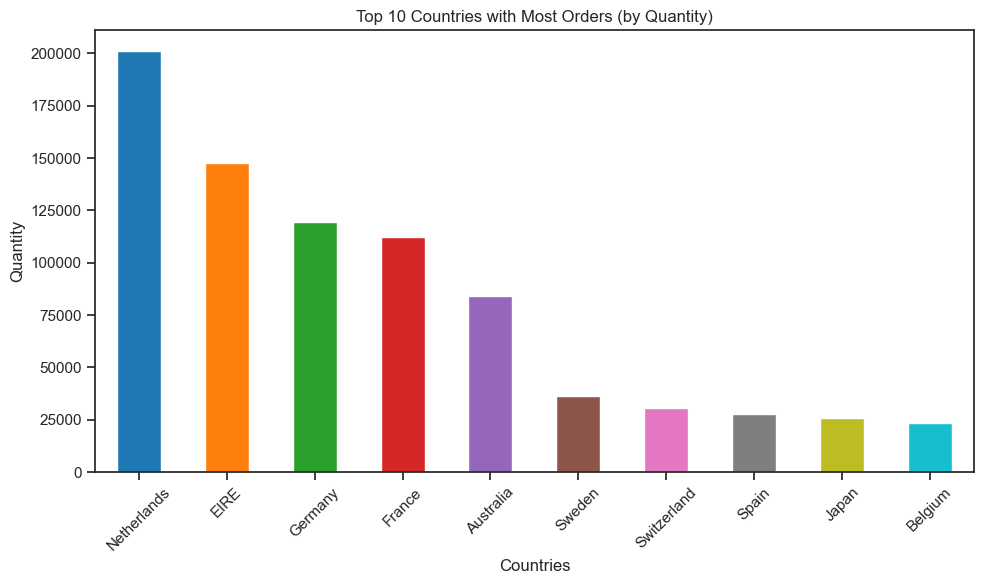

In [15]:
countries = online_rt.groupby("Country").sum(numeric_only=True)
top_countries = countries.sort_values(by="Quantity", ascending=False)[1:11]
colors = plt.cm.tab10.colors  # 10 distinct colors from matplotlib's colormap

# Plotting
top_countries["Quantity"].plot(kind="bar", figsize=(10, 6) , color=colors)
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.title("Top 10 Countries with Most Orders (by Quantity)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
online_rt = online_rt[online_rt.Quantity > 0]

In [6]:
customers = online_rt.groupby(['CustomerID', 'Country']).sum(numeric_only=True)
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)
top_countries = ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers['Country'].isin(top_countries)]


In [7]:
g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend()

In [8]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice

In [9]:
grouped = online_rt[online_rt.Country.isin(top_countries)].groupby(['CustomerID', 'Country'])
plottable = grouped[['Quantity', 'Revenue']].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
plottable['Country'] = plottable.index.get_level_values(1)

In [10]:
g = sns.FacetGrid(plottable, col="Country")
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)
g.add_legend()

In [11]:
grouped_all = online_rt.groupby('CustomerID')[['Quantity', 'Revenue']].agg('sum')
grouped_all['AvgPrice'] = grouped_all.Revenue / grouped_all.Quantity
plt.scatter(grouped_all.Quantity, grouped_all.AvgPrice)
plt.plot()

[]

In [12]:
grouped_zoom = online_rt.groupby(['CustomerID', 'Country'])[['Quantity', 'Revenue']].agg('sum')
grouped_zoom['AvgPrice'] = grouped_zoom.Revenue / grouped_zoom.Quantity
plt.scatter(grouped_zoom.Quantity, grouped_zoom.AvgPrice)
plt.xlim(-40, 2000)
plt.ylim(-1, 80)
plt.plot()

[]

In [13]:
price_start, price_end, price_interval = 0, 50, 1
buckets = np.arange(price_start, price_end, price_interval)
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()

C:\Users\balas\AppData\Local\Temp\ipykernel_29692\1684022140.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()


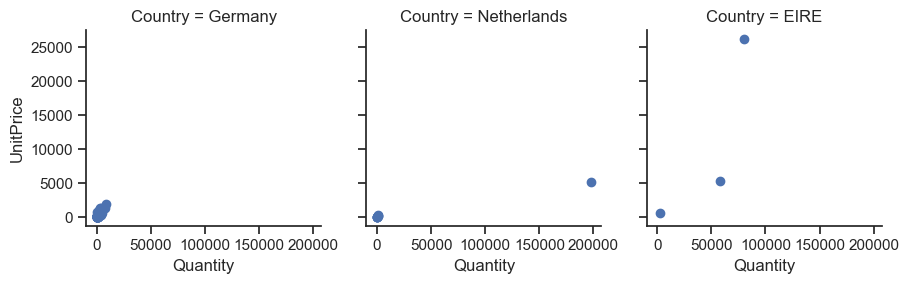

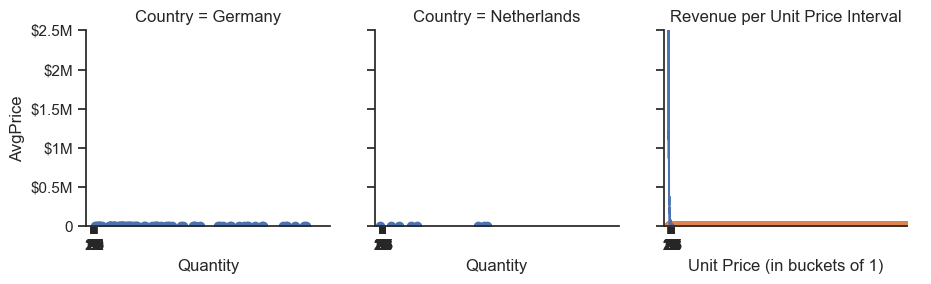

In [14]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in buckets of ' + str(price_interval) + ')')
plt.ylabel('Revenue')
plt.xticks(np.arange(price_start, price_end, 3), np.arange(price_start, price_end, 3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.title("Revenue per Unit Price Interval")
plt.show()